In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#datasets
male_file = "nhanes_adult_male_bmx_2020_x.csv"
female_file = "nhanes_adult_female_bmx_2020_x.csv"
male = np.loadtxt(male_file, delimiter=',', skiprows=1)
female = np.loadtxt(female_file, delimiter=',', skiprows=1)

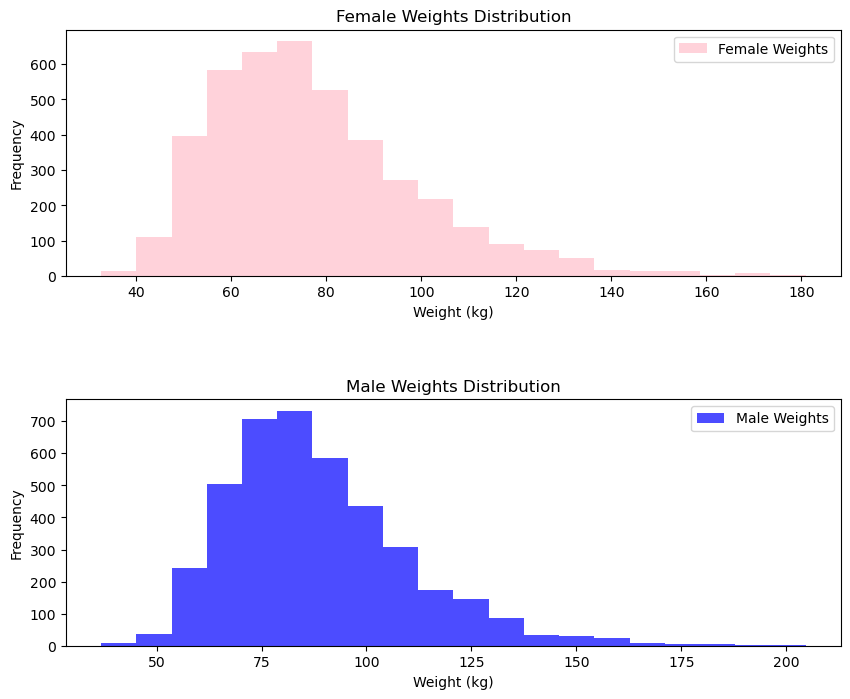

In [3]:
# Histograms for male and female weights
plt.figure(figsize=(10, 8))

# Female weights

#Creates a subplot for the histogram of female weights in the top section of the figure.
plt.subplot(2, 1, 1)

plt.hist(female[:, 0], bins=20, color='pink', alpha=0.7, label='Female Weights')
plt.title('Female Weights Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()

# Male weights

#Creates a subplot for the histogram of male weights in the bottom section of the figure.
plt.subplot(2, 1, 2)

plt.hist(male[:, 0], bins=20, color='blue', alpha=0.7, label='Male Weights')
plt.title('Male Weights Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()

# x-axis limits are the same for both
plt.subplots_adjust(hspace=0.5)
plt.show()

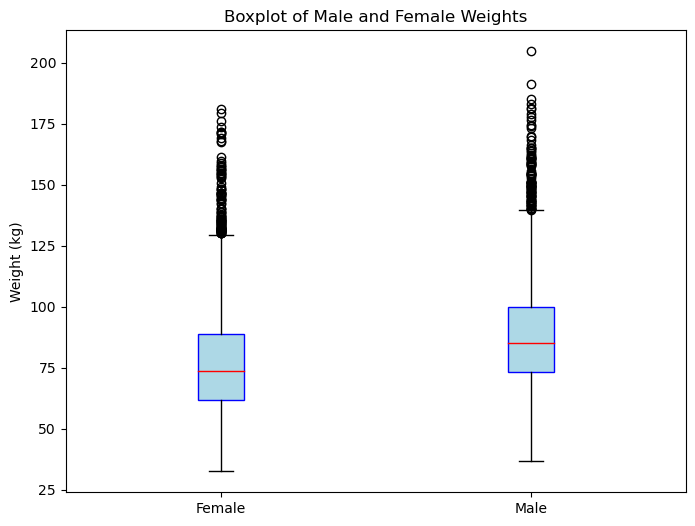

In [4]:
# Boxplot comparison of male and female weights
plt.figure(figsize=(8, 6))

#This section creates a boxplot to compare the weight distributions between males and females
#Highlighting differences in spread and central tendencies.
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female', 'Male'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Boxplot of Male and Female Weights')
plt.ylabel('Weight (kg)')
plt.show()

In [11]:
# Basic numerical aggregates
# Defines a function
def summarize_weights(weights, gender):
    
    mean = np.mean(weights)
    median = np.median(weights)
    std_dev = np.std(weights)
    skewness = pd.Series(weights).skew()
    print(f"{gender} Weights Summary:")
    print(f"\n Mean: {mean:.2f},\n Median: {median:.2f},\n Std Dev: {std_dev:.2f},\n Skewness: {skewness:.2f}\n")

summarize_weights(female[:, 0], "Female")
summarize_weights(male[:, 0], "Male")

Female Weights Summary:

 Mean: 77.40,
 Median: 73.60,
 Std Dev: 21.54,
 Skewness: 1.03

Male Weights Summary:

 Mean: 88.36,
 Median: 85.00,
 Std Dev: 21.42,
 Skewness: 0.98



In [13]:
# Add BMI to female dataset
bmi = female[:, 0] / ((female[:, 1] / 100) ** 2) 
female = np.column_stack((female, bmi))

In [14]:
# This standardizes the female dataset by converting all columns to z-scores 
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)

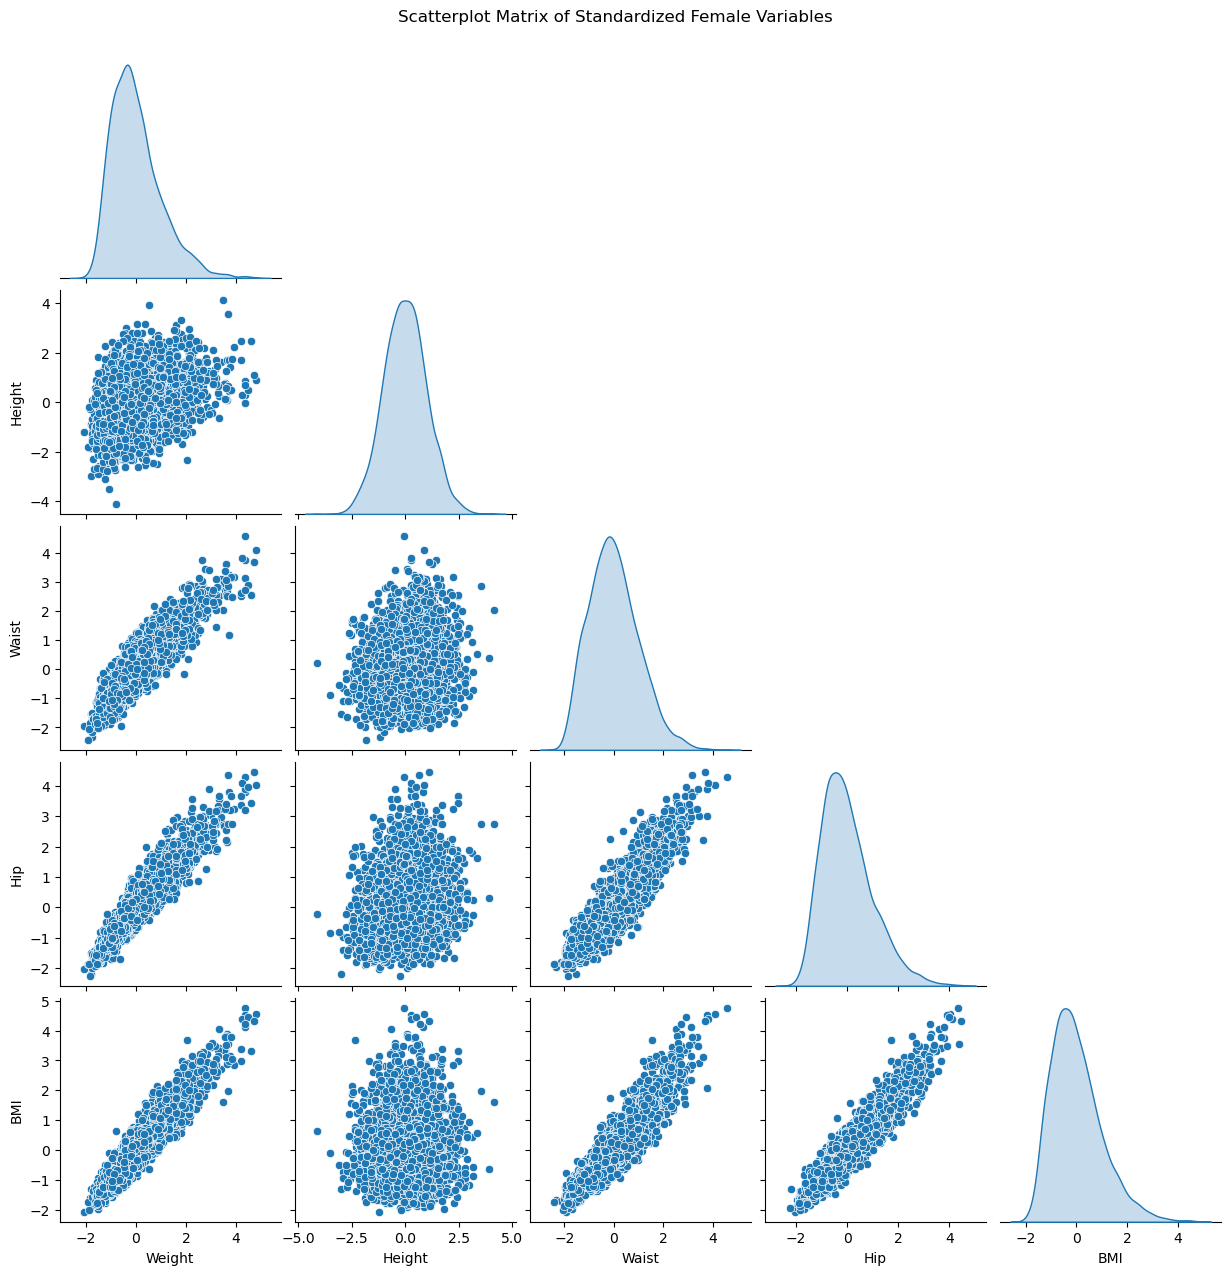

Pearson Correlation:
 [[1.         0.34549627 0.90455038 0.94655347 0.94590048]
 [0.34549627 1.         0.12654714 0.20289468 0.03307725]
 [0.90455038 0.12654714 1.         0.89740696 0.92119833]
 [0.94655347 0.20289468 0.89740696 1.         0.94419901]
 [0.94590048 0.03307725 0.92119833 0.94419901 1.        ]]
Spearman Correlation:
           0         1         2         3         4
0  1.000000  0.338860  0.900169  0.946634  0.937999
1  0.338860  1.000000  0.108587  0.205405  0.019897
2  0.900169  0.108587  1.000000  0.888037  0.923114
3  0.946634  0.205405  0.888037  1.000000  0.934196
4  0.937999  0.019897  0.923114  0.934196  1.000000


In [15]:
# Scatterplot matrix
# weight, height, waist, hip, BMI
variables = [0, 1, 6, 5, 7]

# This creates a scatterplot matrix for selected standardized variables to visualize relationships and correlations
sns.pairplot(pd.DataFrame(zfemale[:, variables], columns=['Weight', 'Height', 'Waist', 'Hip', 'BMI']),
             diag_kind='kde', corner=True)

plt.suptitle('Scatterplot Matrix of Standardized Female Variables', y=1.02)
plt.show()

# Compute correlations
# Computes Pearson correlation coefficients to measure linear relationships between variables.
pearson_corr = np.corrcoef(zfemale[:, variables], rowvar=False)

spearman_corr = pd.DataFrame(zfemale[:, variables]).corr(method='spearman')
print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)

In [17]:
# Waist-to-height and waist-to-hip ratios
# This computes waist-to-height and waist-to-hip ratios for male participants, later used for comparison
male_ratios = male[:, [6, 5]] / male[:, [1, 5]]  
female_ratios = female[:, [6, 5]] / female[:, [1, 5]]

# Append these columns to the datasets
male = np.column_stack((male, male_ratios))
female = np.column_stack((female, female_ratios))


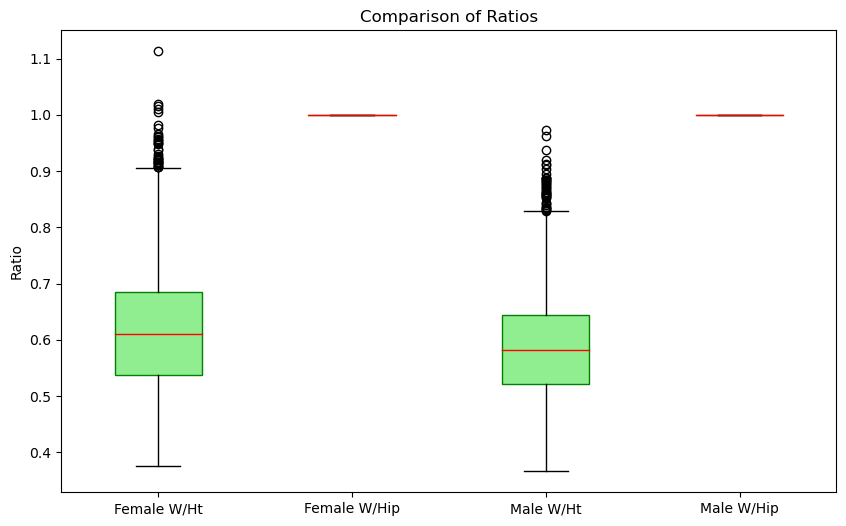

In [18]:
# Creates a boxplot comparing waist-to-height and waist-to-hip ratios for males and females.
plt.figure(figsize=(10, 6))
plt.boxplot([female[:, -2], female[:, -1], male[:, -2], male[:, -1]],
            labels=['Female W/Ht', 'Female W/Hip', 'Male W/Ht', 'Male W/Hip'],
            patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'))
plt.title('Comparison of Ratios')
plt.ylabel('Ratio')
plt.show()

In [19]:
# This identifies individuals with the lowest and highest BMI by sorting the standardized BMI values.
sorted_bmi = np.argsort(zfemale[:, 7])
lowest_bmi = zfemale[sorted_bmi[:5]]
highest_bmi = zfemale[sorted_bmi[-5:]]
print("Lowest BMI Individuals:\n", lowest_bmi)
print("Highest BMI Individuals:\n", highest_bmi)

Lowest BMI Individuals:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383 -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577 -1.89319577]]
Highest BMI Individuals:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.817379